### Download and extract data

In [ ]:
# Download data from kaggle - https://www.kaggle.com/datasets/salader/dogs-vs-cats

# !curl -L -o ~/Downloads/dogs-vs-cats.zip\
#   https://www.kaggle.com/api/v1/datasets/download/salader/dogs-vs-cats

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1089M  100 1089M    0     0  11.5M      0  0:01:34  0:01:34 --:--:-- 10.6M      0  0:01:34  0:01:33  0:00:01 10.9M


In [ ]:
# from zipfile import ZipFile

# file = "/home/ree/Downloads/dogs-vs-cats.zip"

# with ZipFile(file, "r") as f:
#     f.extractall("data")

### Create Generator objects
Since there are a lot of images the size will be huge\
So we cannot process them at once in our memory\
So we use a generator object - See python generators 

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# creating a dataset generator object
train_dataset = image_dataset_from_directory(
    directory="./data/train",
    labels="inferred",          # labels are automatically inferred from the cat and dog folder
    label_mode="int",           # labels are encoded as integers (0 and 1 for binary classification)
    image_size=(256, 256),      # convert all images to 256x256 for uniformity
    batch_size=32               # batch size for training
)

validation_dataset = image_dataset_from_directory(
    directory="./data/test",
    labels="inferred",     
    label_mode="int",     
    image_size=(256, 256),
    batch_size=32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_dataset       # we get a dataset generator object

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Preprocess Data for Training

In [11]:
# Normalize - 0 to 255 -> 0 to 1

def normalize(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

### Build model and train

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer, Flatten

In [ ]:
# Create CNN model

model = Sequential(
    [
        InputLayer(shape=(256, 256, 3)),

        Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
        MaxPool2D(pool_size=(2,2)),

        Flatten(),

        Dense(units=128, activation="relu"),
        Dense(units=128, activation="relu"),
        Dense(units=1, activation="sigmoid")
    ]
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,855,617 (56.67 MB)

 Trainable params: 14,855,617 (56.67 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
history = model.fit(
    train_dataset,                          # the train dataset generator object we created
    epochs=10,
    validation_data=validation_dataset      # the validation dataset generator object we created
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5964 - loss: 0.6899

2025-03-07 16:36:13.051410: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 16:36:13.187638: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,125,125]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,127,127]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.5965 - loss: 0.6899 - val_accuracy: 0.6702 - val_loss: 0.5920
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.7197 - loss: 0.5415 - val_accuracy: 0.7696 - val_loss: 0.5029
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.8057 - loss: 0.4172 - val_accuracy: 0.7874 - val_loss: 0.4939
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8860 - loss: 0.2690 - val_accuracy: 0.7624 - val_loss: 0.6752
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9437 - loss: 0.1422 - val_accuracy: 0.7544 - val_loss: 0.9380
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.9668 - loss: 0.0860 - val_accuracy: 0.7716 - val_loss: 1.1279
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.9767 - loss: 0.0725 - val_accuracy: 0.7692 - val_loss: 1.1729
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.9841 - loss: 0.0484 - val_accura

In [ ]:
# Note 
# Since batch size is 32, we can see 625 batches
# 20,000 train sampls so 20,000/32 = 625 batches

<Axes: >

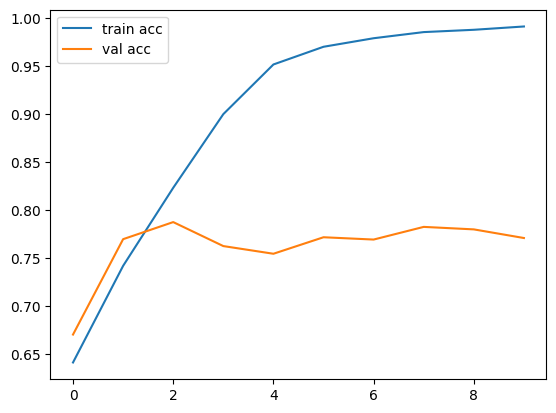

In [22]:
# Plotting the results 

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(history.history["accuracy"], label="train acc")
sns.lineplot(history.history["val_accuracy"], label="val acc")

<Axes: >

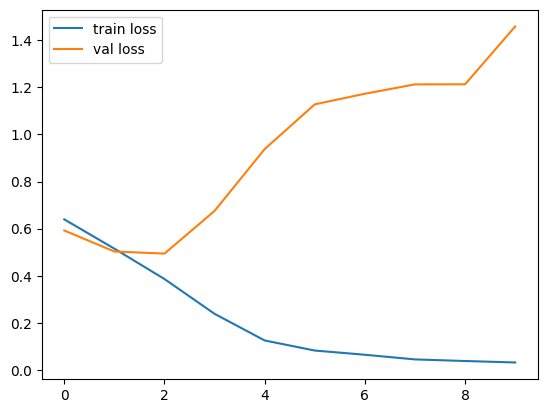

In [23]:
sns.lineplot(history.history["loss"], label="train loss")
sns.lineplot(history.history["val_loss"], label="val loss")

### Conclusion

We can see that the model is overfitting\
To fix this we can:
1. Add more data (Not possible here as we used our entire dataset)
2. Data Augmentation
3. L1/L2 Regularizer
4. Dropouts
5. Reduce model complexity
6. Batch Normalization  

Try out these once if you got time Ree

### Prediction

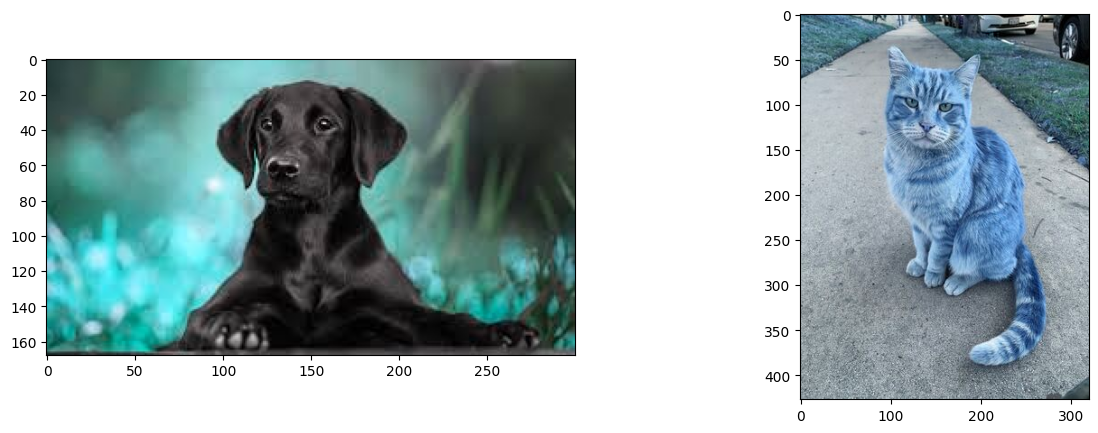

In [44]:
import cv2 

dog = cv2.imread("./dog.jpg")
cat = cv2.imread("./cat.jpg")

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(dog)
ax[1].imshow(cat)
plt.show()

In [45]:
# Okay the colours are wierd due to matplotlib loading or cv2 

In [46]:
dog.shape, cat.shape        # image sizes

((168, 300, 3), (427, 320, 3))

In [47]:
# Resize images to 256x256 as we used that size for training

dog = cv2.resize(dog, (256, 256))
cat = cv2.resize(cat, (256, 256))

dog.shape, cat.shape

((256, 256, 3), (256, 256, 3))

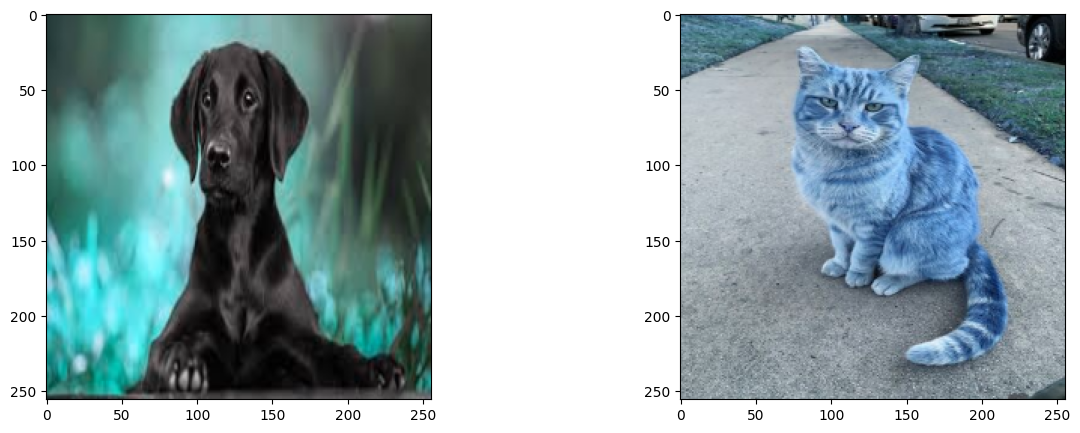

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(dog)
ax[1].imshow(cat)
plt.show()

In [49]:
# Convert to batches for input as our model expects batch input

dog = dog.reshape(1, 256, 256, 3)       # batch size 1 
cat = cat.reshape(1, 256, 256, 3)       # batch size 1

dog.shape, cat.shape

((1, 256, 256, 3), (1, 256, 256, 3))

In [50]:
model.predict(dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


array([[1.]], dtype=float32)

In [51]:
model.predict(cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[1.]], dtype=float32)